# **Analyse des données immobilières ⭐**

In [ ]:
import pandas as pd

In [ ]:
pd.set_option("display.max_columns", None)
dataset = pd.read_csv("selogerdata.csv")
dataset.head()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
0,11,750116,75016,75016,0,178817,144013899,227883,0,0,√©quip√©e,SL,1,2,13,3,11,59000,1,0,0,69.00,Appartement,Paris 16√®me
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,aucune,SL,1,2,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10√®me
2,6,750118,75018,75018,0,115811,138648733,108873,0,0,aucune,SL,1,1,8,2,6,94000,0,0,0,37.00,Appartement,Paris 18√®me
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,aucune,SL,1,2,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10√®me
4,4,750116,75016,75016,0,97567,147153067,145098,0,0,0,SL,1,1,5,2,4,100000,0,0,0,14.93,Appartement,Paris 16√®me


In [ ]:
dataset.shape

(8899, 24)

In [ ]:
dataset[['nb_pieces', 'nb_chambres','prix']].describe()

,nb_pieces,nb_chambres,prix
count,8899.000000,8899.000000,8.899000e+03
mean,3.838746,2.319474,1.210579e+06
std,1.483164,1.170877,4.462923e+05
min,1.000000,1.000000,5.900000e+04
25%,3.000000,1.000000,7.950000e+05
50%,4.000000,2.000000,1.475000e+06
75%,5.000000,3.000000,1.490000e+06
max,53.000000,22.000000,2.000000e+06


In [ ]:
dataset.columns

Index(['number', 'codeinsee', 'codepostal', 'cp', 'etage', 'idagence',
       'idannonce', 'idtiers', 'idtypechauffage', 'idtypecommerce',
       'idtypecuisine', 'idtypepublicationsourcecouplage', 'naturebien',
       'nb_chambres', 'nb_photos', 'nb_pieces', 'position', 'prix',
       'si_balcon', 'si_sdEau', 'si_sdbain', 'surface', 'typedebien', 'ville'],
      dtype='object')

# **Nettoyage des données 🦦**

In [ ]:
dataset.isna().sum()

,0
number,0
codeinsee,0
codepostal,0
cp,0
etage,0
idagence,0
idannonce,0
idtiers,0
idtypechauffage,0
idtypecommerce,0


In [ ]:
dataset[dataset['nb_pieces'] == dataset['nb_pieces'].max()]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1318,18,750118,75018,75018,0,228375,149412073,261580,0,0,aucune,SL,1,2,12,53,18,580000,0,0,0,53.0,Appartement,Paris 18√®me


In [ ]:
dataset[dataset['nb_chambres'] == 22]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1236,0,750115,75015,75015,0,260996,146819689,282708,0,0,√©quip√©e,SL,1,22,4,3,0,567000,0,0,0,77.0,Appartement,Paris 15√®me


In [ ]:
dataset[dataset['surface'] == 0]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
2030,3,750116,75016,75016,0,76979,147347131,108380,0,0,0,SL,1,1,6,4,3,747840,0,0,0,0.0,Appartement,Paris 16√®me


In [ ]:
# axis = 0 pour les lignes, 1 pour les colonnes
# inplace = True pour remplacer mon fichier
dataset.drop([1236, 1318,2030], axis = 0, inplace = True)

In [ ]:
dataset['cp'].equals(dataset['codepostal'])

True

In [ ]:
dataset['position'].equals(dataset['number'])

True

In [ ]:
dataset.nunique().sort_values(ascending= False)

,0
idannonce,3812
idagence,1412
idtiers,1412
surface,1217
prix,1051
ville,112
codeinsee,107
codepostal,105
cp,105
nb_photos,27


In [ ]:
to_remove = ['number', 'cp', 'etage', 'idagence','idannonce', 'idtiers',
             'idtypechauffage', 'idtypecommerce', 'si_sdEau', 'si_sdbain',
             'codeinsee','codepostal']

dataset.drop(to_remove, axis = 1, inplace = True)
dataset.shape

(8896, 12)

In [ ]:
dataset.duplicated().any()

np.True_

In [ ]:
dataset.duplicated().sum()

np.int64(5063)

In [ ]:
dataset = dataset.drop_duplicates()
dataset.shape

(3833, 12)

In [ ]:
dataset['idtypecuisine'].unique()

array(['√©quip√©e', 'aucune', '0', 'coin cuisine √©quip√©',
       'coin cuisine', 's√©par√©e', 's√©par√©e √©quip√©e', 'am√©ricaine',
       'am√©ricaine √©quip√©e', '-1'], dtype=object)

In [ ]:
def clean_cuisine(x):
    if x == "0":
      return "categorie_0"
    if x == "-1":
      return "categorie_1"

    x = x.replace("√©","é")
    x = x.strip()
    return x

In [ ]:
dataset["idtypecuisine"] = dataset['idtypecuisine'].apply(clean_cuisine)
dataset['idtypecuisine'].unique()

array(['équipée', 'aucune', 'categorie_0', 'coin cuisine équipé',
       'coin cuisine', 'séparée', 'séparée équipée', 'américaine',
       'américaine équipée', 'categorie_1'], dtype=object)

In [ ]:
dataset['ville'].unique()

array(['Paris 16√®me', 'Paris 10√®me', 'Paris 18√®me', 'Melun',
       'Corbeil Essonnes', '√âtampes', 'Issou', 'Limay', '√âvry', 'Avon',
       'Evry', 'Saint-Denis', 'Trappes', 'Ris Orangis', 'Paris 19√®me',
       'Paris 14√®me', '√âpinay-sous-S√©nart', 'Eragny sur Oise',
       'Argenteuil', 'Bessancourt', 'Etampes', 'Montlhery', 'Gagny',
       'Fleury Merogis', 'Villeparisis', 'Fosses', 'Vaujours', 'Les Ulis',
       'Meaux', 'Pontoise', 'Cergy', 'Verneuil sur Seine',
       'Brie Comte Robert', 'Carrieres sous Poissy', 'H√©ricy', 'Igny',
       'Paris 20√®me', 'Les Pavillons-sous-Bois', 'Mennecy',
       'Vert le Petit', 'Morsang-sur-Orge', 'Linas', 'Mandres les Roses',
       'Paris 17√®me', 'Villepinte', 'Paris 2√®me', 'Paris 15√®me',
       'Paris 6√®me', 'Paris 3√®me', 'Paris 8√®me', 'Paris 5√®me',
       'Paris 11√®me', 'Paris 9√®me', 'Paris 13√®me', 'Paris 12√®me',
       'Garches', 'Chatou', 'Sucy en Brie', 'Louveciennes', 'Le Pecq',
       'Enghien les Bains', 'Saint Ger

In [ ]:
dataset['ville'] = (dataset['ville']
                    .str.replace('√®','è')
                    .str.replace('√â','É')
                    .str.replace('√©','é')
                    .str.replace('L ',"L'")
                    )

In [ ]:
import numpy as np

In [ ]:
display(np.sort(dataset['ville'].unique()))

array(['Argenteuil', 'Asnieres sur Seine', 'Asnières-sur-Seine', 'Avon',
       'Bagnolet', 'Bailly', 'Bessancourt', 'Boulogne',
       'Brie Comte Robert', 'Buc', 'Carrieres sous Poissy',
       'Carrières sous Poissy', 'Cergy', 'Chatillon', 'Chatou',
       'Chennevieres sur Marne', 'Chessy', 'Clamart', 'Clichy',
       'Corbeil Essonnes', 'Courbevoie', 'Enghien les Bains',
       'Eragny sur Oise', 'Etampes', 'Evry', 'Fleury Merogis', 'Fosses',
       'Gagny', 'Garches', 'Gentilly', 'Gif-sur-Yvette', 'Héricy', 'Igny',
       'Issou', 'Issy-les-Moulineaux', "L'Isle Adam",
       'La Celle Saint Cloud', 'La Garenne-Colombes',
       'Le Kremlin Bicetre', 'Le Mesnil le Roi', 'Le Pecq',
       'Le Port Marly', 'Les Clayes sous Bois', 'Les Lilas',
       'Les Pavillons-sous-Bois', 'Les Ulis', 'Limay', 'Linas',
       'Livry-Gargan', 'Lognes', 'Louveciennes', 'Maisons Alfort',
       'Maisons-Laffitte', 'Mandres les Roses', 'Meaux', 'Melun',
       'Mennecy', 'Meudon', 'Montesson', 'Montl

In [ ]:
dataset.duplicated().any()

np.False_

# **Analyse exploratoire des données ⛏**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='prix', ylabel='Density'>

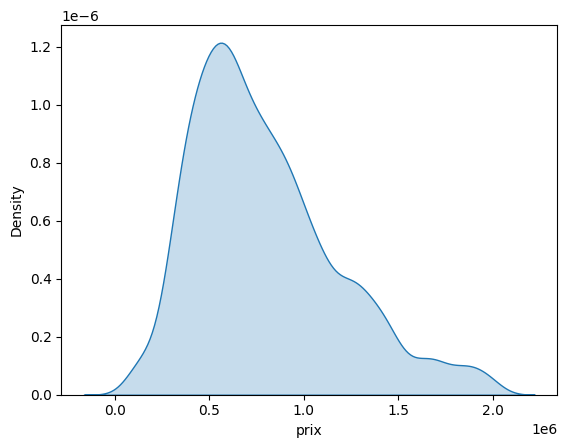

In [ ]:
sns.kdeplot(data = dataset, x = 'prix', fill=True)

<Axes: xlabel='surface', ylabel='prix'>

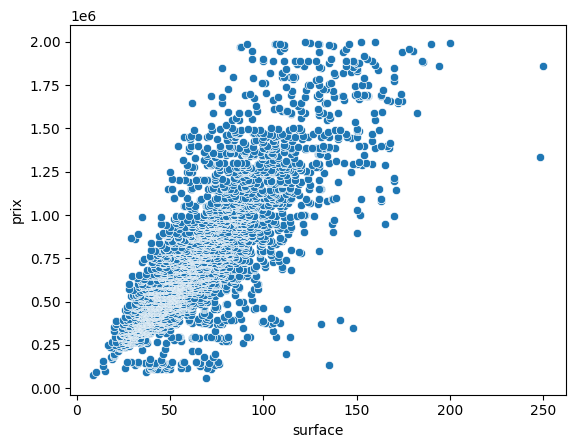

In [ ]:
sns.scatterplot(data = dataset, x = 'surface', y = 'prix')


<Axes: xlabel='nb_chambres', ylabel='prix'>

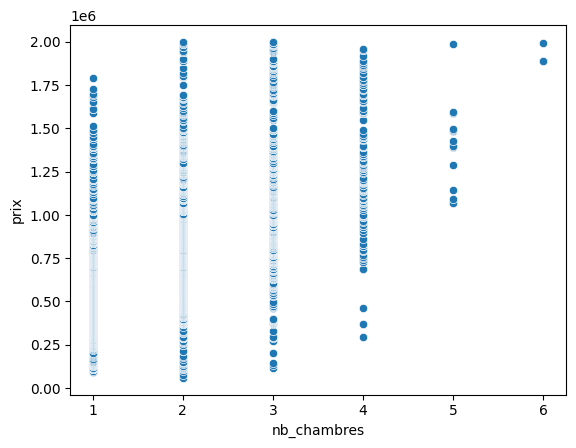

In [ ]:
sns.scatterplot(data = dataset, x = 'nb_chambres', y = 'prix')

<Axes: xlabel='nb_pieces', ylabel='prix'>

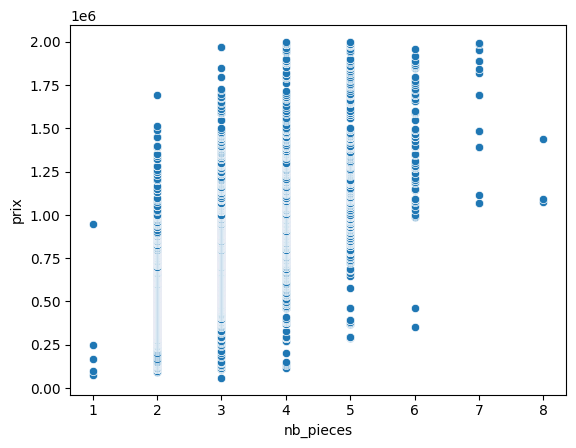

In [ ]:
sns.scatterplot(data = dataset, x = 'nb_pieces', y = 'prix')

<Axes: xlabel='prix', ylabel='Density'>

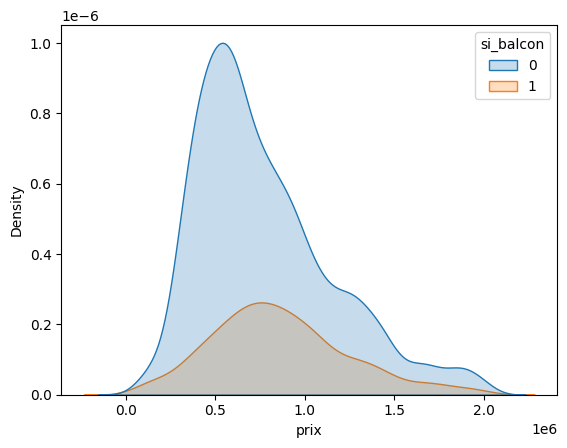

In [ ]:
sns.kdeplot(data = dataset, x = 'prix', hue = 'si_balcon',fill=True)

<Axes: xlabel='si_balcon', ylabel='prix'>

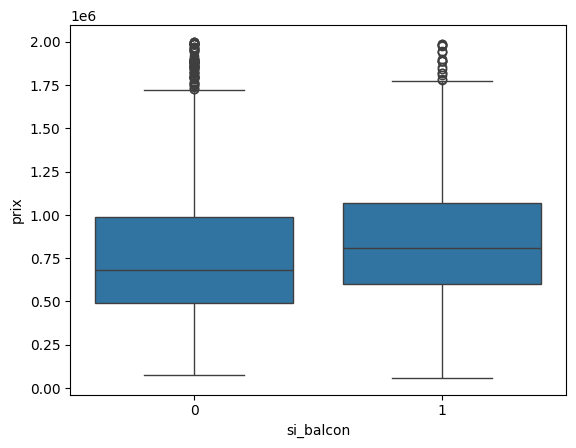

In [ ]:
sns.boxplot(data = dataset, x = 'si_balcon', y = 'prix')

<Axes: xlabel='nb_chambres', ylabel='prix'>

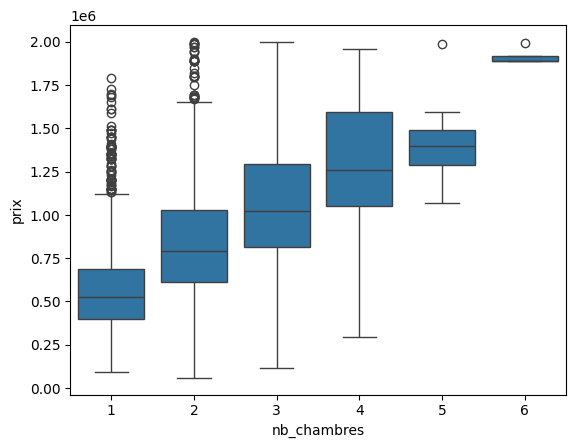

In [ ]:
# Visualiser le prix en fonction du nombre de chambres en boxplots
sns.boxplot(data = dataset, x = 'nb_chambres', y = 'prix')

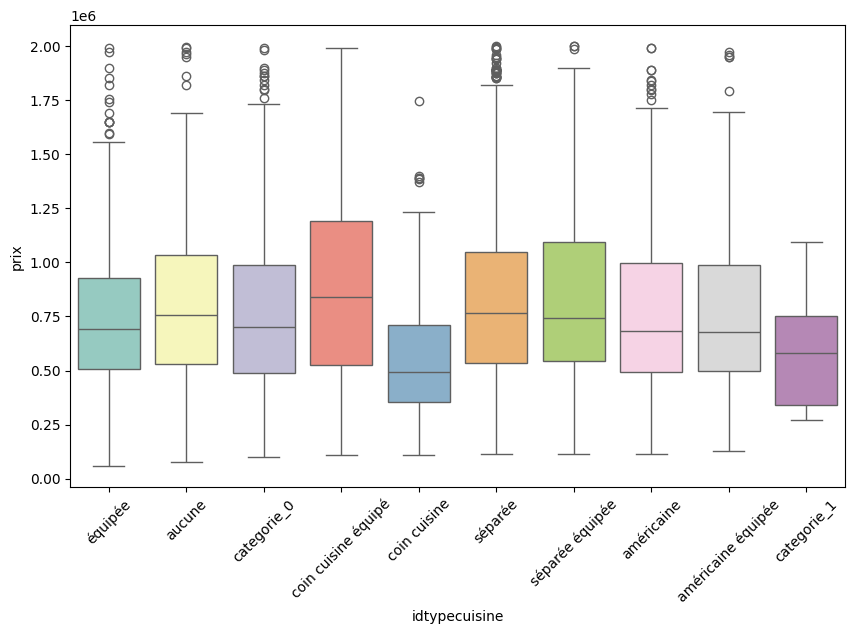

In [ ]:
# Visualiser le prix en fonction de idtypecuisine
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(y=dataset['prix'],x=dataset['idtypecuisine'],
            hue=dataset['idtypecuisine'],ax=ax, palette='Set3', legend=False)
ax.tick_params(axis = 'x', rotation = 45)


In [ ]:
dataset['ville'].nunique()

112

In [ ]:
dataset['ville'].value_counts(ascending=True)

,count
ville,
Melun,1
Étampes,1
Limay,1
Évry,1
Evry,1
...,...
Paris 13ème,278
Paris 17ème,294
Paris 15ème,299


In [ ]:
dataset.loc[~dataset['ville'].str.startswith('Paris'), 'ville'] = 'Banlieue'
dataset['ville'].value_counts()

,count
ville,
Paris 16ème,443
Paris 18ème,308
Paris 15ème,299
Paris 17ème,294
Paris 13ème,278
Paris 19ème,212
Paris 11ème,195
Paris 20ème,194
Paris 14ème,194


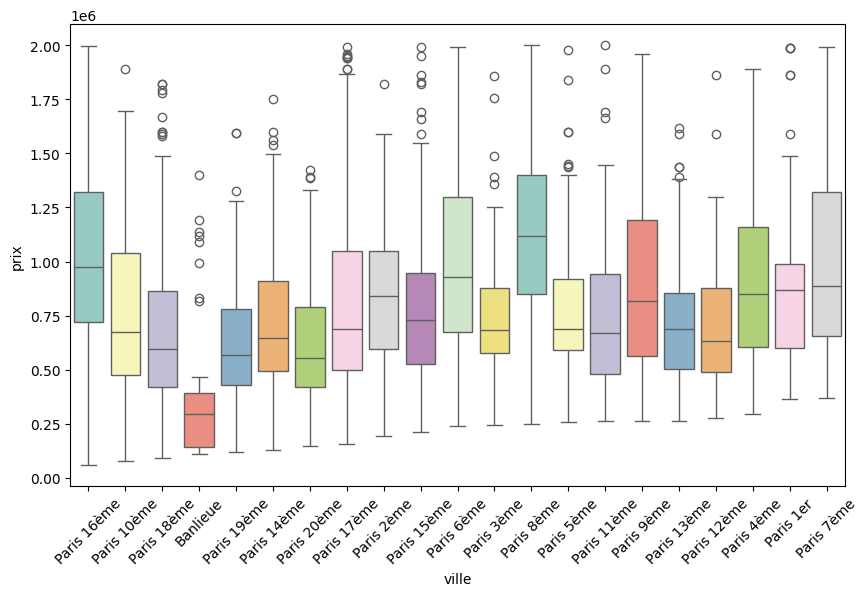

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(y=dataset['prix'],x=dataset['ville'],
            hue=dataset['ville'],ax=ax, palette='Set3', legend=False)
ax.tick_params(axis = 'x', rotation = 45)

# **Modélisation : étude du déterminant des prix ⏰**

In [ ]:
dataset.head()

,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,surface,typedebien,ville
0,équipée,SL,1,2,13,3,11,59000,1,69.00,Appartement,Paris 16ème
1,aucune,SL,1,2,7,1,8,77500,0,8.49,Appartement,Paris 10ème
2,aucune,SL,1,1,8,2,6,94000,0,37.00,Appartement,Paris 18ème
3,aucune,SL,1,2,4,1,16,96000,0,10.26,Appartement,Paris 10ème
4,categorie_0,SL,1,1,5,2,4,100000,0,14.93,Appartement,Paris 16ème


In [ ]:
categorical_sub = ['typedebien','idtypepublicationsourcecouplage','naturebien',
                   'idtypecuisine','ville']

df = pd.get_dummies(dataset, columns = categorical_sub,
                    drop_first=True).astype(int)
df.head()

,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,surface,typedebien_Loft/Atelier/Surface,idtypepublicationsourcecouplage_SL,idtypepublicationsourcecouplage_SL9,naturebien_2,naturebien_3,idtypecuisine_américaine équipée,idtypecuisine_aucune,idtypecuisine_categorie_0,idtypecuisine_categorie_1,idtypecuisine_coin cuisine,idtypecuisine_coin cuisine équipé,idtypecuisine_séparée,idtypecuisine_séparée équipée,idtypecuisine_équipée,ville_Paris 10ème,ville_Paris 11ème,ville_Paris 12ème,ville_Paris 13ème,ville_Paris 14ème,ville_Paris 15ème,ville_Paris 16ème,ville_Paris 17ème,ville_Paris 18ème,ville_Paris 19ème,ville_Paris 1er,ville_Paris 20ème,ville_Paris 2ème,ville_Paris 3ème,ville_Paris 4ème,ville_Paris 5ème,ville_Paris 6ème,ville_Paris 7ème,ville_Paris 8ème,ville_Paris 9ème
0,2,13,3,11,59000,1,69,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,1,8,77500,0,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,8,2,6,94000,0,37,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2,4,1,16,96000,0,10,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,2,4,100000,0,14,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import statsmodels.api as sm

In [ ]:
y = df['prix']
X = df.drop(['prix'],axis=1)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     430.0
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:01:14   Log-Likelihood:                -51461.
No. Observations:                3833   AIC:                         1.030e+05
Df Residuals:                    3792   BIC:                         1.033e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
pvalues_dict = model.pvalues.to_dict()
pvalues_dict

In [ ]:
import operator
sorted_pvalues = dict (sorted(model.pvalues.items(), key=operator.itemgetter(1)))
sorted_pvalues


In [ ]:
sorted_pvalues['surface']
list_keys = list(sorted_pvalues.keys())
list_keys[0:2]

['surface', 'ville_Paris 6ème']

In [ ]:
list_values = list(sorted_pvalues.values())
list_values[0:2]

[0.0, 9.583638280014832e-236]

In [ ]:
list_items = list(sorted_pvalues.items())
list_items[0:2]

[('surface', 0.0), ('ville_Paris 6ème', 9.583638280014832e-236)]

# **Prédiction du prix 💆**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model=sm.OLS(y_train,X_train).fit()
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean squared error : {rmse:.2f}")

Root Mean squared error : 170974.57


Text(0, 0.5, 'Fréquences')

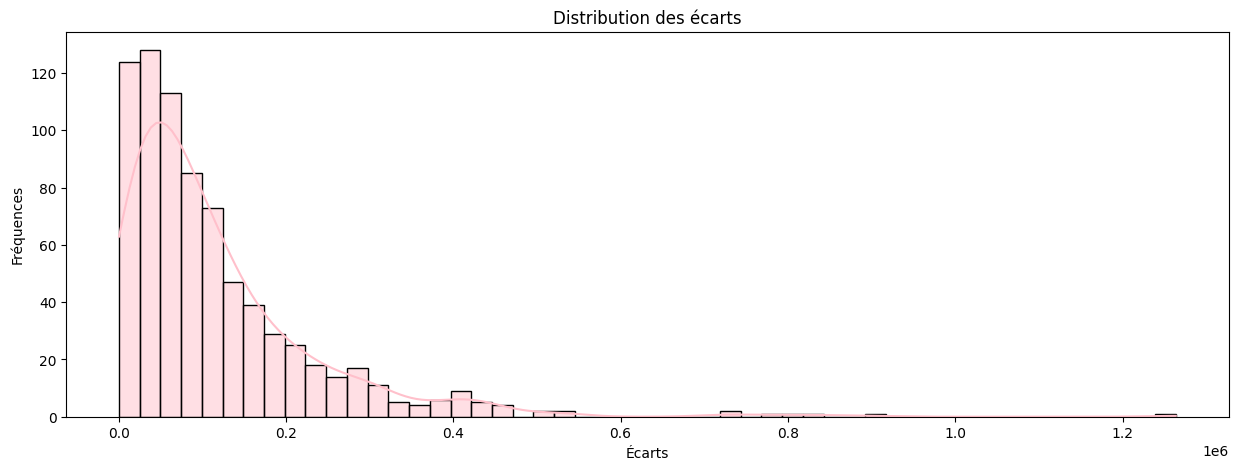

In [ ]:
ecarts=np.abs(y_pred-y_test)

fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(ecarts, ax=ax,color= 'pink',kde=True)
ax.set_title('Distribution des écarts')
ax.set_xlabel('Écarts')
ax.set_ylabel('Fréquences')